In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stocks = ['MSFT', 'AAPL', 'AMZN', 'GOOG', 'GOOGL', 'FB','BRK-B','JNJ', 'V', 'PG', 'JPM', 'UNH', 'MA', 'INTC', 'VZ', 'HD', 'DIS', 'NFLX', 'ADBE', 'PYPL']
     

In [ ]:
weights = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])


In [ ]:
startDate = '2018-08-06'
endDate = datetime.today().strftime('%Y-%m-%d')

In [ ]:
df = pd.DataFrame()
for stock in stocks:
  df[stock] = pdr.data.DataReader(stock, data_source='yahoo', start=startDate, end=endDate)['Adj Close']

In [ ]:
df

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,BRK-B,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,DIS,NFLX,ADBE,PYPL
Date,,,,,,,,,,,,,,,,,,,,
2018-08-06,105.108788,203.140244,1847.750000,1224.770020,1237.670044,185.690002,206.059998,125.073265,137.723221,78.073189,109.841881,248.686508,199.351212,46.978725,48.218323,186.039932,113.658562,350.920013,254.110001,85.769997
2018-08-07,105.837830,201.235825,1862.479980,1242.219971,1255.839966,183.809998,208.720001,124.542725,138.285126,78.186729,110.245148,249.548538,200.419510,47.359894,48.199947,187.332870,114.266357,351.829987,253.389999,86.300003
2018-08-08,106.430786,201.371887,1886.520020,1245.609985,1261.329956,185.179993,208.940002,124.267975,138.679398,77.912354,110.470253,250.672073,200.656906,47.607647,48.420464,188.255051,111.737129,347.609985,253.830002,86.739998
2018-08-09,106.605751,202.955643,1898.520020,1249.099976,1264.459961,183.089996,209.100006,124.296402,138.018936,77.013542,109.616776,253.364655,201.388870,47.779175,48.705284,188.312073,111.913597,349.359985,253.800003,87.169998
2018-08-10,105.954483,202.351089,1886.300049,1237.609985,1252.510010,180.259995,206.630005,123.870087,137.742935,77.041916,108.538254,252.173294,200.449188,46.549908,48.209141,186.619858,110.462715,345.869995,253.699997,87.010002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,212.479996,444.450012,3167.459961,1494.489990,1498.369995,268.440002,209.479996,148.600006,196.063599,133.550003,99.379997,317.029999,328.019989,48.029999,58.529999,271.640015,129.929993,494.730011,449.570007,198.630005
2020-08-10,208.250000,450.910004,3148.159912,1496.099976,1496.819946,263.000000,212.580002,148.029999,196.492935,134.100006,100.639999,319.100006,322.880005,49.220001,58.990002,274.730011,128.789993,483.380005,443.290009,193.320007
2020-08-11,203.380005,437.500000,3080.669922,1480.319946,1480.540039,256.130005,212.660004,146.970001,197.471466,133.229996,103.820000,315.549988,328.540009,48.189999,58.509998,274.920013,130.490005,466.929993,435.230011,189.029999


In [ ]:
corrMatrix = df.corr()
corrMatrix

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,BRK-B,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,DIS,NFLX,ADBE,PYPL
MSFT,1.000000,0.938541,0.840366,0.876332,0.866762,0.876638,-0.272041,0.725882,0.881803,0.825162,0.101781,0.690445,0.872448,0.738904,0.558440,0.875741,0.209879,0.685178,0.970409,0.878638
AAPL,0.938541,1.000000,0.853556,0.908998,0.906615,0.853111,-0.146847,0.730906,0.791074,0.688659,0.159809,0.780051,0.784805,0.679579,0.469277,0.862477,0.141047,0.684750,0.942555,0.833188
AMZN,0.840366,0.853556,1.000000,0.741846,0.744036,0.792563,-0.401100,0.641003,0.598355,0.483512,-0.204340,0.671450,0.582141,0.440463,0.207300,0.753220,-0.059938,0.889984,0.904792,0.920159
GOOG,0.876332,0.908998,0.741846,1.000000,0.999429,0.892420,0.021505,0.699244,0.848773,0.704887,0.370291,0.729473,0.841470,0.800144,0.539013,0.882736,0.306193,0.608052,0.878939,0.763899
GOOGL,0.866762,0.906615,0.744036,0.999429,1.000000,0.889427,0.026504,0.697358,0.836210,0.686063,0.368258,0.735209,0.828543,0.791510,0.523912,0.877237,0.298747,0.611628,0.874309,0.761955
FB,0.876638,0.853111,0.792563,0.892420,0.889427,1.000000,-0.053499,0.627077,0.890863,0.757162,0.291511,0.628518,0.886684,0.645178,0.520049,0.910192,0.457560,0.653799,0.897082,0.884375
BRK-B,-0.272041,-0.146847,-0.401100,0.021505,0.026504,-0.053499,1.000000,0.002165,0.049615,-0.027030,0.843789,-0.008057,0.078035,-0.012883,0.256006,-0.024382,0.614473,-0.431531,-0.274234,-0.349465
JNJ,0.725882,0.730906,0.641003,0.699244,0.697358,0.627077,0.002165,1.000000,0.613609,0.505772,0.150713,0.786478,0.603120,0.660240,0.497116,0.569424,0.134934,0.630589,0.730786,0.625300
V,0.881803,0.791074,0.598355,0.848773,0.836210,0.890863,0.049615,0.613609,1.000000,0.905393,0.447182,0.528723,0.993896,0.738659,0.699700,0.896490,0.582170,0.426938,0.832006,0.742334
PG,0.825162,0.688659,0.483512,0.704887,0.686063,0.757162,-0.027030,0.505772,0.905393,1.000000,0.350510,0.379383,0.916647,0.665299,0.820949,0.788835,0.535207,0.281536,0.723303,0.664341


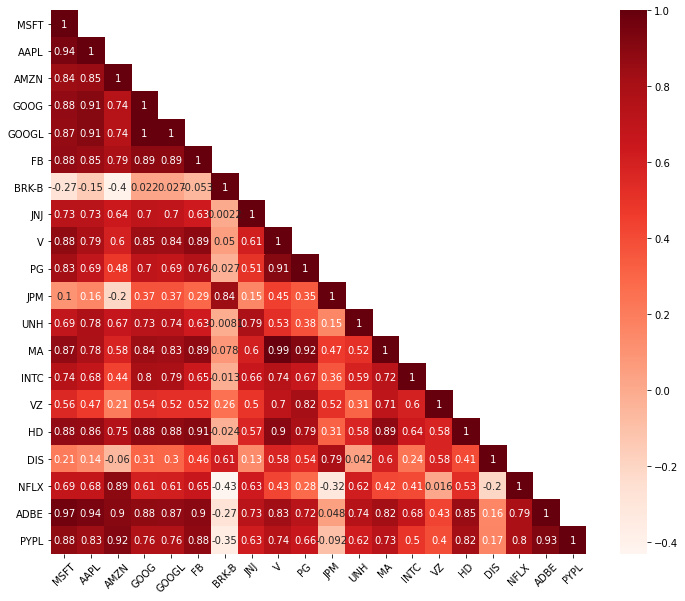

In [ ]:
mask = np.zeros_like(corrMatrix) #showing only the lower half as both lower and upper half are same
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(12,10))
sb.heatmap(corrMatrix, annot=True, mask = mask, cmap=plt.cm.Reds)
plt.xticks(rotation=45)
plt.show()


NameError: ignored

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.4MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [ ]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('MSFT', 0.0), ('AAPL', 0.37914), ('AMZN', 0.00193), ('GOOG', 0.0), ('GOOGL', 0.0), ('FB', 0.0), ('BRK-B', 0.0), ('JNJ', 0.0), ('V', 0.0), ('PG', 0.42955), ('JPM', 0.0), ('UNH', 0.0), ('MA', 0.0), ('INTC', 0.0), ('VZ', 0.0), ('HD', 0.0), ('DIS', 0.0), ('NFLX', 0.0), ('ADBE', 0.0), ('PYPL', 0.18938)])
Expected annual return: 40.5%
Annual volatility: 28.2%
Sharpe Ratio: 1.37


(0.4049432604389339, 0.28171822578816397, 1.3664123411326226)

In [ ]:
def get_top_five(stockslist):  
    # Get all correlations
    correlation_df = df.corr()
    
    least_corr_sym = []
    least_corr_coef = []
    
    for symbol in stockslist:

        top_five = abs(correlation_df[symbol]).sort_values(ascending=True).head(5)

        for item in zip(top_five.index, top_five):

            index_tuple = (symbol, item[0])
            least_corr_sym.append(index_tuple)
            least_corr_coef.append(item[1])

    pd.set_option('display.max_rows', None)
    top_five_df = pd.DataFrame(
        least_corr_coef,
        index = pd.MultiIndex.from_tuples(least_corr_sym, names=('Symbol', 'Least correlation')),
        columns=['CC']
    )
    
    return top_five_df

In [ ]:
top_five = get_top_five(stocks).sort_values('CC',axis=0,ascending=True).drop_duplicates().head(5)
top_five

CC
Symbol Least correlation          
BRK-B  JNJ                0.002165
       UNH                0.008057
INTC   BRK-B              0.012883
VZ     NFLX               0.015821
BRK-B  GOOG               0.021505